Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [2]:
import numpy as np
import matplotlib.pyplot as plt

zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])


def mse(y, y_pred):
    n = len(y)
    return np.sum((y - y_pred) ** 2) / n

n = len(zp)
a = 0
b = 0
lr = 1e-06


n_iterations = 1001

for i in range(n_iterations):
    y_pred = a + b * zp
    d_a = (-2/n) * np.sum(ks - y_pred)
    d_b = (-2/n) * np.sum((ks - y_pred) * zp)
    a = a - lr * d_a
    b = b - lr * d_b
    error = mse(ks, y_pred)
    if i % 100 == 0:
        print(f'Итерация: {i}, Ошибка: {error}, a: {a}, b: {b}')

Итерация: 0, Ошибка: 534426.9, a: 0.0014198000000000001, b: 0.16228340000000002
Итерация: 100, Ошибка: 58290.11468720933, a: 0.06352701165264334, b: 5.53907267139291
Итерация: 200, Ошибка: 56503.62789478378, a: 0.08847711289407637, b: 5.867800050544907
Итерация: 300, Ошибка: 56491.88742250524, a: 0.11115334533167748, b: 5.887751704659264
Итерация: 400, Ошибка: 56486.78754251583, a: 0.13368941869388748, b: 5.888816424940228
Итерация: 500, Ошибка: 56481.71302075434, a: 0.1562158460516812, b: 5.888725892552282
Итерация: 600, Ошибка: 56476.63910677028, a: 0.17874061057657134, b: 5.888564704507622
Итерация: 700, Ошибка: 56471.56570790964, a: 0.20126420063110484, b: 5.8883992025513585
Итерация: 800, Ошибка: 56466.492823773726, a: 0.22378664614146374, b: 5.888233444620853
Итерация: 900, Ошибка: 56461.42045430907, a: 0.24630794899256553, b: 5.888067678928305
Итерация: 1000, Ошибка: 56456.34859946334, a: 0.26882810935411966, b: 5.887901920655762


Коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept) ~ 5.89

Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [3]:
def _mse_ab(a,b, x, y):
    return np.sum(((a+b*x)-y)**2)/len(x)

def _mse_pa(a,b,x,y): 
    return 2*np.sum((a+b*x)-y)/len(x)

def _mse_pb(a,b,x,y):
    return 2*np.sum(((a+b*x)-y)*x)/len(x)

alpha=5e-05

b=0.1
a=0.1
mseab_min=_mse_ab(a,b,zp,ks)
i_min=1
b_min=b
a_min=a
   
for i in range(1000000):
    a-=alpha*_mse_pa(a,b,zp,ks)
    b-=alpha*_mse_pb(a,b,zp,ks)
    if i%50000==0:
        print(f'Итерация {i}, a={a}, b={b}, mse={_mse_ab(a, b, zp,ks)}')
    if _mse_ab(a, b,zp,ks)>mseab_min:
        print(f'Итерация {i_min}, a={a_min}, b={b_min}, mse={mseab_min},\nДостигнут минимум.')
        break
    else:
        mseab_min=_mse_ab(a, b,zp,ks)
        i_min=i
        b_min=b
        a_min=a
print(f'a={a_min}\nb={b_min}')

Итерация 0, a=0.169966, b=8.07468054476, mse=122318.06397097567
Итерация 50000, a=319.27767648420047, b=3.5398324356503275, mse=10427.569111705801
Итерация 100000, a=409.0442373734796, b=2.879127619051743, mse=6783.521961452364
Итерация 150000, a=434.29473705519484, b=2.693277491833349, mse=6495.188684804794
Итерация 200000, a=441.3974680483413, b=2.6409995775222037, mse=6472.374468908443
Итерация 250000, a=443.39540029510493, b=2.62629428586797, mse=6470.569306309746
Итерация 300000, a=443.95740007610897, b=2.622157823932053, mse=6470.426473787141
Итерация 350000, a=444.1154853937451, b=2.6209942756156086, mse=6470.415172240385
Итерация 400000, a=444.159953325044, b=2.6206669802831115, mse=6470.414278011555
Итерация 450000, a=444.1724617410292, b=2.6205749151465225, mse=6470.414207256183
Итерация 500000, a=444.1759802422447, b=2.6205490180788695, mse=6470.414201657699
Итерация 520164, a=444.17653163778414, b=2.62054495966686, mse=6470.414201349592,
Достигнут минимум.
a=444.17653163778

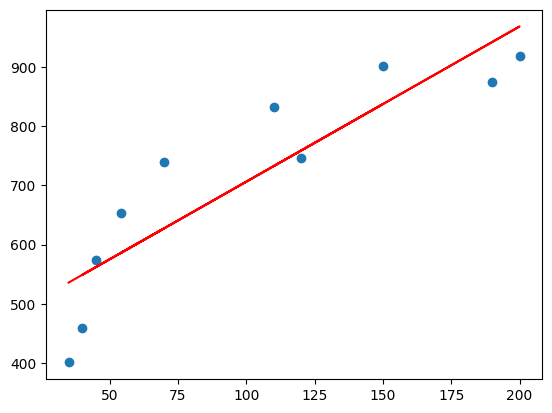

In [4]:
plt.scatter(zp,ks)
plt.plot(zp,a_min+b_min*zp, c='r')
plt.show()